<a href="https://colab.research.google.com/github/joshimohitm9/Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score ,ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge ,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
# loading dataset
df=pd.read_csv("https://raw.githubusercontent.com/rcz7795/Bangalore-Housing-Price-Prediction/master/Bengaluru_House_Data.csv")

In [ ]:
# sample out of dataset
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13202,Built-up Area,Ready To Move,CV Raman Nagar,2 BHK,NaN,1310,2.0,1.0,62.0
9981,Super built-up Area,Ready To Move,Basaveshwara Nagar Yelahanka,3 BHK,NaN,1950,4.0,3.0,95.0
2374,Super built-up Area,Ready To Move,B Channasandra,2 BHK,NaN,1300,2.0,1.0,79.0
7580,Built-up Area,Ready To Move,Malleshpalya,2 BHK,KencyRe,1421,2.0,1.0,90.0
8301,Super built-up Area,18-May,Nagawara Junction,4 BHK,NaN,3602,4.0,NaN,280.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.shape

(13320, 9)

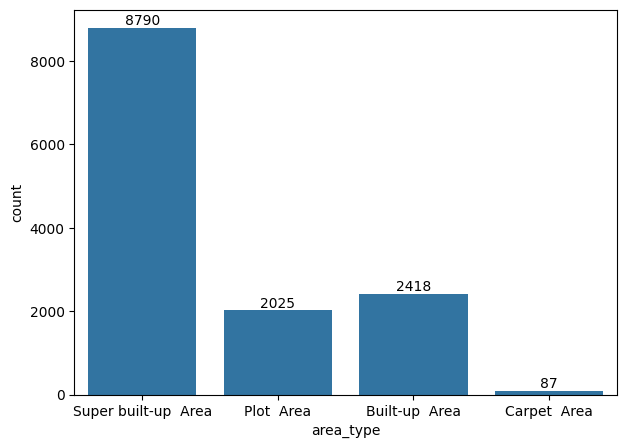

In [ ]:
plt.figure(figsize=(7,5))
a=sns.countplot(x=df["area_type"],data=df)

for bars in a.containers:
  a.bar_label(bars)
plt.show()


In [ ]:
# data need some cleaning

for i in df["availability"].unique():
  print(i)

print("_"*20)
print("count of unique availability",len(df["availability"].unique()))

19-Dec
Ready To Move
18-May
18-Feb
18-Nov
20-Dec
17-Oct
21-Dec
19-Sep
20-Sep
18-Mar
20-Feb
18-Apr
20-Aug
18-Oct
19-Mar
17-Sep
18-Dec
17-Aug
19-Apr
18-Jun
22-Dec
22-Jan
18-Aug
19-Jan
17-Jul
18-Jul
21-Jun
20-May
19-Aug
18-Sep
17-May
17-Jun
21-May
18-Jan
20-Mar
17-Dec
16-Mar
19-Jun
22-Jun
19-Jul
21-Feb
Immediate Possession
19-May
17-Nov
20-Oct
20-Jun
19-Feb
21-Oct
21-Jan
17-Mar
17-Apr
22-May
19-Oct
21-Jul
21-Nov
21-Mar
16-Dec
22-Mar
20-Jan
21-Sep
21-Aug
14-Nov
19-Nov
15-Nov
16-Jul
15-Jun
17-Feb
20-Nov
20-Jul
16-Sep
15-Oct
15-Dec
16-Oct
22-Nov
15-Aug
17-Jan
16-Nov
20-Apr
16-Jan
14-Jul
____________________
count of unique availability 81


In [ ]:
for i in df["location"].unique():
  print(i)

print("_"*20)
print("total unique location are: ",len(df["location"].unique()))


Electronic City Phase II
Chikka Tirupathi
Uttarahalli
Lingadheeranahalli
Kothanur
Whitefield
Old Airport Road
Rajaji Nagar
Marathahalli
Gandhi Bazar
7th Phase JP Nagar
Gottigere
Sarjapur
Mysore Road
Bisuvanahalli
Raja Rajeshwari Nagar
Ramakrishnappa Layout
Manayata Tech Park
Kengeri
Binny Pete
Thanisandra
Bellandur
 Thanisandra
Mangammanapalya
Electronic City
Ramagondanahalli
Yelahanka
Hebbal
Kasturi Nagar
Kanakpura Road
Electronics City Phase 1
Kundalahalli
Chikkalasandra
Murugeshpalya
Sarjapur  Road
Ganga Nagar
HSR Layout
Doddathoguru
KR Puram
Himagiri Meadows
Adarsh Nagar
Bhoganhalli
Lakshminarayana Pura
Begur Road
Devanahalli
Govindaraja Nagar Ward
Tharabanahalli
Varthur
Bommanahalli
Gunjur
Devarachikkanahalli
Double Road
Hegde Nagar
Haralur Road
Hennur Road
Kothannur
Kalena Agrahara
Cholanayakanahalli
Kaval Byrasandra
ISRO Layout
Kodanda Reddy Layout
Garudachar Palya
EPIP Zone
Dasanapura
Kasavanhalli
Sanjay nagar
 Mysore Highway
Domlur
Sarjapura - Attibele Road
Devasthanagalu
T Da

In [ ]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# we will drop socity
df["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [ ]:
df["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [ ]:
df["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [ ]:
df["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

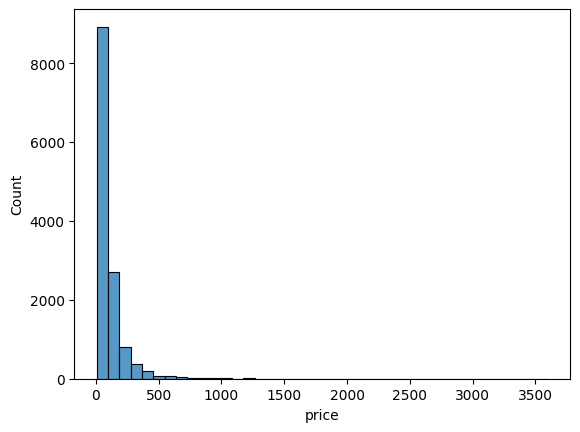

In [ ]:
sns.histplot(df["price"],bins=40)

Handaling Missing Values


In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df_null=df.isnull().sum()/df.shape[0]*100
df_null

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [ ]:
df_null[df_null>0].index

Index(['location', 'size', 'society', 'bath', 'balcony'], dtype='object')

In [ ]:
df_clean=df.copy()

<Axes: >

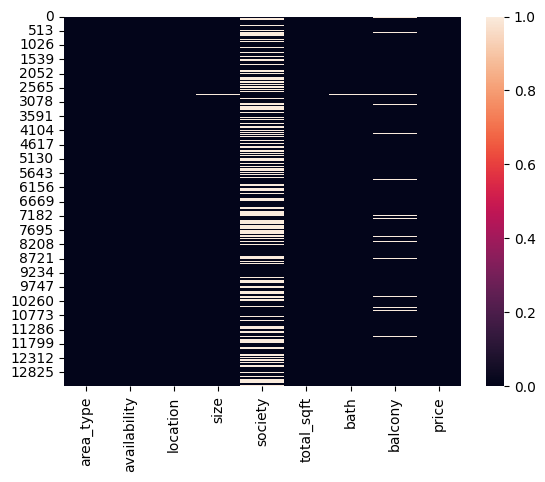

In [ ]:
sns.heatmap(df_clean.isnull())

In [ ]:
df_clean[df_clean["location"].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [ ]:
df_clean["location"]=df_clean["location"].fillna(df_clean["location"].mode()[0])

In [ ]:
df_clean.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df_clean[df_clean["size"].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [ ]:
df_clean.dropna(subset=["size"],inplace=True)

In [ ]:
df_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [ ]:
df_clean.drop(columns=["society","area_type"],inplace=True)

In [ ]:
df_clean.isnull().sum()

availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [ ]:
df_clean["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df_clean["size"]

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13304, dtype: object

In [ ]:
df_clean["BHK"] = df_clean["size"].apply(lambda x: int(x.split(" ")[0]))

In [ ]:
df_clean.head()

,availability,location,size,total_sqft,bath,balcony,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
df_clean.drop(columns=["size"],inplace=True)

<Axes: >

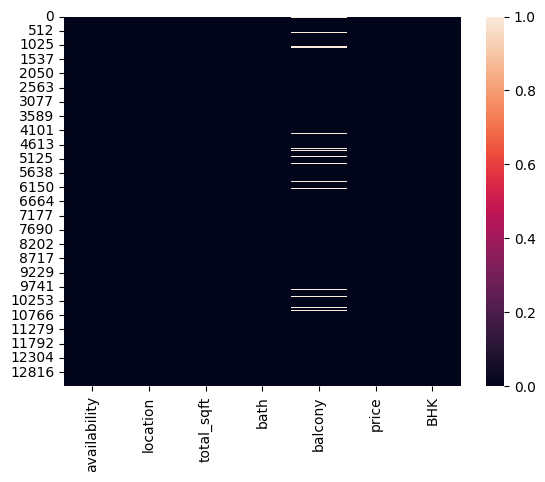

In [ ]:
sns.heatmap(df_clean.isnull())

In [ ]:
df_clean

,availability,location,total_sqft,bath,balcony,price,BHK
0,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5
13316,Ready To Move,Richards Town,3600,5.0,NaN,400.00,4
13317,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,18-Jun,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [ ]:
df_clean.isnull().sum()

availability      0
location          0
total_sqft        0
bath             57
balcony         593
price             0
BHK               0
dtype: int64

In [ ]:
for i in df_clean["total_sqft"].unique():
  print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1520 - 1740
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
30

In [ ]:
def floatconvert(x):
  try:
    float(x)
  except:
    return  False
  return True

In [ ]:
df_clean[~df_clean["total_sqft"].apply(floatconvert)]

,availability,location,total_sqft,bath,balcony,price,BHK
30,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,20-Feb,Devanahalli,3010 - 3410,NaN,NaN,192.000,4
81,18-Oct,Hennur Road,2957 - 3450,NaN,NaN,224.500,4
122,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...
12990,18-May,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Ready To Move,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Ready To Move,Devanahalli,1020 - 1130,NaN,NaN,52.570,1
13265,20-Sep,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [ ]:
def avg_sqft(x):
  a=x.split("-")
  if len(a)==2:
    return (float(a[0])+float(a[1])/2)
  try:
    return float(x)
  except:
    return None



In [ ]:
df_clean["total_sqft"]=df_clean["total_sqft"].apply(avg_sqft)

In [ ]:
df_clean

,availability,location,total_sqft,bath,balcony,price,BHK
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Ready To Move,Richards Town,3600.0,5.0,NaN,400.00,4
13317,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [ ]:
df_clean.dropna(subset=["total_sqft"],inplace=True)

In [ ]:
df_clean.isnull().sum()

availability      0
location          0
total_sqft        0
bath             57
balcony         589
price             0
BHK               0
dtype: int64

In [ ]:
df_clean.drop(columns=["balcony"],inplace=True)

<Axes: xlabel='bath', ylabel='Count'>

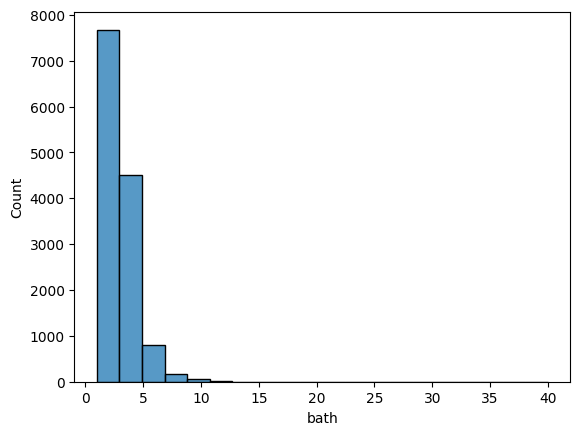

In [ ]:
sns.histplot(x=df_clean["bath"],bins=20)

In [ ]:
df_clean["bath"]=df_clean["bath"].fillna(df_clean["bath"].agg("median"))

In [ ]:
df_clean.isnull().sum()

availability    0
location        0
total_sqft      0
bath            0
price           0
BHK             0
dtype: int64

<Axes: >

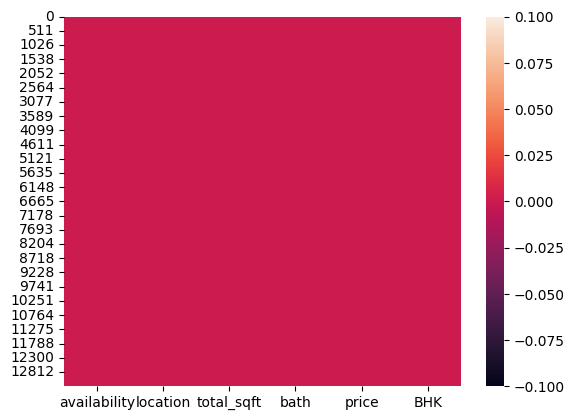

In [ ]:
sns.heatmap(df_clean.isnull())

In [ ]:
df_clean.head()

,availability,location,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,1200.0,2.0,51.00,2


In [ ]:
def function_avalibility(x):
  a=x.split("-")
  try:
      if len(a)>1:
        return "Soon to be Vacated"
      else:
        return x
  except:
    return None

In [ ]:
df_clean["availability"]=df_clean["availability"].apply(function_avalibility)

In [ ]:
df_clean.availability.unique()

array(['Soon to be Vacated', 'Ready To Move'], dtype=object)

In [ ]:
df_clean.drop(columns=["availability"],inplace=True)

In [ ]:
unique_location=df_clean.location.value_counts().sort_values(ascending=False)


In [ ]:
unique_location[unique_location<=10]

location
Dodsworth Layout    10
Nagadevanahalli     10
Kalkere             10
Gunjur Palya        10
Dairy Circle        10
                    ..
Annasandrapalya      1
Richmond Road        1
RMC YARD             1
Panathur Road,       1
Abshot Layout        1
Name: count, Length: 1058, dtype: int64

In [ ]:
df_clean["location"]=df_clean["location"].apply(lambda x: "other" if x in unique_location[unique_location<=10] else x)

In [ ]:
df_clean["location"].value_counts()

location
other                        2888
Whitefield                    538
Sarjapur  Road                397
Electronic City               302
Kanakpura Road                271
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: count, Length: 241, dtype: int64

In [ ]:
df_clean

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,other,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [ ]:
df_clean["price_per_sqft"]=df_clean["price"]*100000/df_clean["total_sqft"]

In [ ]:
housing=df_clean.copy()

In [ ]:
housing.to_csv("housing_clean.csv")

Anomaly Detection


In [ ]:
housing

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [ ]:
housing.shape

(13258, 6)

In [ ]:
housing=housing[~(housing["total_sqft"]/housing["BHK"]<300)]

In [ ]:
housing.shape

(12514, 6)

In [ ]:
housing.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12514.000000,12514.000000,12514.000000,12514.000000,12514.000000
mean,1606.663308,2.560253,111.398333,2.651670,6281.998304
std,1277.637186,1.078441,152.098807,0.977025,4169.304822
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1120.000000,2.000000,49.000000,2.000000,4181.818182
50%,1300.000000,2.000000,70.000000,3.000000,5274.977316
75%,1710.000000,3.000000,115.000000,3.000000,6896.551724
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


z score



In [ ]:
mean= np.mean(housing["price_per_sqft"])
std=np.std(housing["price_per_sqft"])

In [ ]:
min_val= mean-std
max_val= mean+ std

In [ ]:
anomaly=housing[(housing["price_per_sqft"]<min_val) | (housing["price_per_sqft"]>max_val)]

In [ ]:
df_housing=housing[(housing["price_per_sqft"]>min_val) & (housing["price_per_sqft"]<max_val)]
df_housing

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


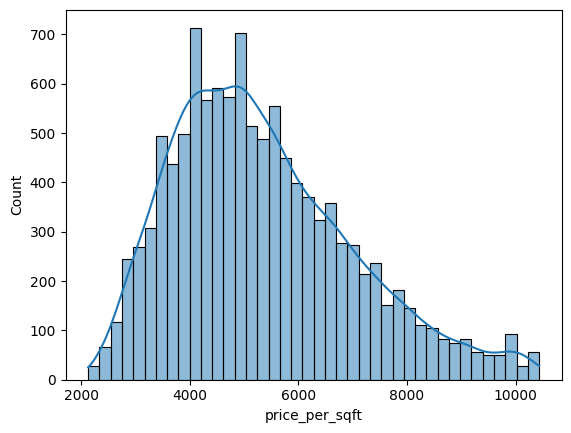

In [ ]:
sns.histplot(x=df_housing["price_per_sqft"],bins=40,kde=True)
plt.show()

In [ ]:
df_housing[df_housing["BHK"]>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
459,other,5000.0,9.0,360.0,11,7200.000000
3609,other,10000.0,16.0,550.0,16,5500.000000
7979,other,6000.0,12.0,150.0,11,2500.000000
9935,other,5425.0,13.0,275.0,13,5069.124424


<Axes: xlabel='total_sqft', ylabel='Count'>

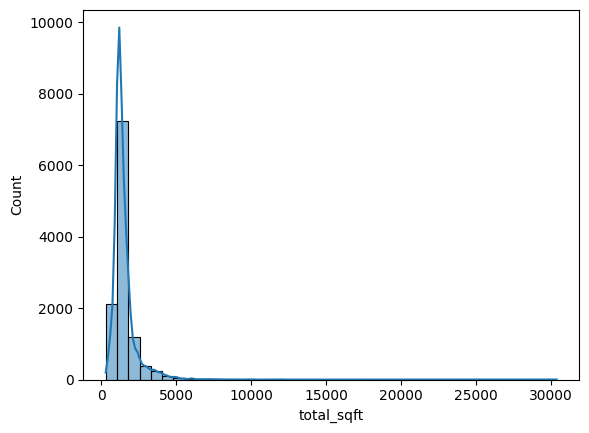

In [ ]:
sns.histplot(x=df_housing["total_sqft"],bins=40,
             kde=True)

In [ ]:
df_housing

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [ ]:
le_location=LabelEncoder()
ohe=OneHotEncoder()
le_location.fit(df_housing["location"])

le__location=le_location.transform(df_housing["location"])

housing_location=ohe.fit_transform(le__location.reshape(-1,1)).toarray()

housing_location=pd.DataFrame(housing_location,columns=le_location.classes_)

In [ ]:
housing_location.shape

(11336, 240)

In [ ]:
housing_location.reset_index(drop=True,inplace=True)

In [ ]:
df_housing_final=pd.concat([df_housing.reset_index(drop=True),housing_location],axis=1)

In [ ]:
df_housing_final.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_housing_final.drop(columns=["location"],inplace=True)

In [ ]:
df_housing_final

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,3699.810606,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2600.0,5.0,120.00,4,4615.384615,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1440.0,2.0,62.00,3,4305.555556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1521.0,3.0,95.00,3,6245.890861,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1200.0,2.0,51.00,2,4250.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,1715.0,3.0,112.00,3,6530.612245,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11332,3453.0,4.0,231.00,5,6689.834926,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11333,1141.0,2.0,60.00,2,5258.545136,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11334,4689.0,4.0,488.00,4,10407.336319,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_housing_final.shape

(11336, 245)

In [ ]:
x=df_housing_final.drop(columns=["price"])
y=df_housing_final["price"]

In [ ]:
x.shape,y.shape

((11336, 244), (11336,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9068, 244), (2268, 244), (9068,), (2268,))

In [ ]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)

x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_test_transformed=pd.DataFrame(x_test_transformed,columns=x_test.columns)

In [ ]:
x_train_transformed

,total_sqft,bath,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0.025748,0.066667,0.133333,0.326172,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.017442,0.066667,0.066667,0.254572,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.048505,0.066667,0.133333,0.585158,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026412,0.066667,0.066667,0.357861,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.051827,0.133333,0.133333,0.585231,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9063,0.052658,0.133333,0.133333,0.318627,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9064,0.030897,0.066667,0.066667,0.526826,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9065,0.043621,0.133333,0.133333,0.863329,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9066,0.022126,0.066667,0.066667,0.354491,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_train_transformed.drop(columns=['price_per_sqft'],inplace=True)
x_test_transformed.drop(columns=['price_per_sqft'],inplace=True)

x_train_transformed

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0.025748,0.066667,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.017442,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.048505,0.066667,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026412,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.051827,0.133333,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9063,0.052658,0.133333,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9064,0.030897,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9065,0.043621,0.133333,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9066,0.022126,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)
lr.score(x_test_transformed,y_test)

0.7887333570188035

In [ ]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=9)
cross_val_score(LinearRegression(),x,y,cv=cv)
cross_val_score(LinearRegression(),x,y,cv=cv).mean()

0.9513384077976916

In [ ]:
y_pred=lr.predict(x_test_transformed)
r2_score(y_pred,y_test)

0.7330057795413163

In [ ]:
model={
    "linear_regression":LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso(),
    "decision_tree":DecisionTreeRegressor()
}

parameters={
    "linear_regression":{},
    "ridge":{"alpha":[0.1,0.5,1,2.5,5,7.5,10]},
    "lasso":{"alpha":[0.1,0.5,1,2.5,5,7.5,10]},
    "decision_tree":{"criterion":["mse","friedman_mse"],"splitter":["best","random"]}
          }


cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=9)
scores=[]
for name, model in model.items():
  grid_search=GridSearchCV(estimator=model,param_grid=parameters[name],cv=5)
  grid_search.fit(x_train_transformed,y_train)
  scores.append({
      "model":name,
      "best_score":grid_search.best_score_,
      "best_params":grid_search.best_params_
  })

In [ ]:
scores

[{'model': 'linear_regression',
  'best_score': -3.7150677991984915e+21,
  'best_params': {}},
 {'model': 'ridge',
  'best_score': 0.8220287909297379,
  'best_params': {'alpha': 0.1}},
 {'model': 'lasso',
  'best_score': 0.8004929167429802,
  'best_params': {'alpha': 0.1}},
 {'model': 'decision_tree',
  'best_score': 0.7509745462141397,
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'random'}}]

In [ ]:
scores=pd.DataFrame(scores)
scores

,model,best_score,best_params
0,linear_regression,-3.715068e+21,{}
1,ridge,8.220288e-01,{'alpha': 0.1}
2,lasso,8.004929e-01,{'alpha': 0.1}
3,decision_tree,7.509745e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
model=Ridge(alpha=0.1)
model.fit(x_train_transformed,y_train)
model.score(x_test_transformed,y_test)

0.7886441098552684

In [ ]:
x_train_transformed.columns

Index(['total_sqft', 'bath', 'BHK', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=243)

In [ ]:
def price_prediction(location,sqft,bath,BHK):
  location_index=np.where(x_train_transformed.columns==location)[0][0]
  x=np.zeros(len(x_train_transformed.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=BHK
  if location_index>=0:
    x[location_index]=1

  return model.predict([x])[0]


In [ ]:
price_prediction("1st Phase JP Nagar",1200,2,2)

2308997.736070702

In [ ]:
y_pred=model.predict(x_test_transformed)
r2_score(y_pred,y_test)

0.7286474658978019

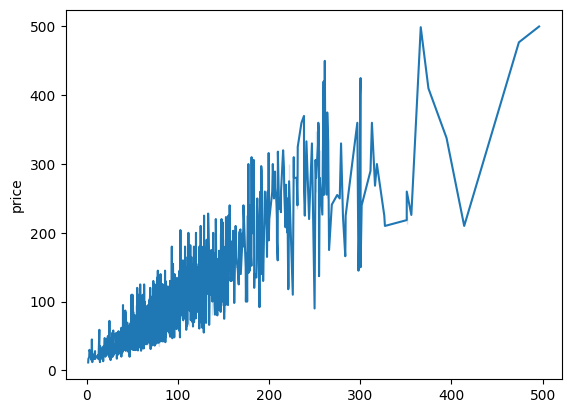

In [ ]:
sns.lineplot(x=y_pred,y=y_test)
plt.show()

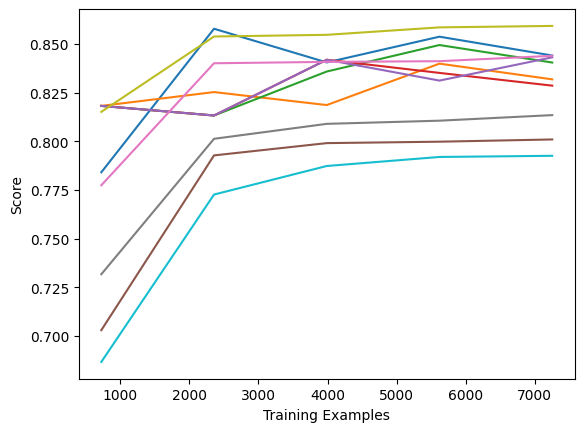

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=x_train_transformed, y=y_train, cv=5
)

plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, val_scores, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.show()

In [ ]:
with open("bangluru_house_price_pridiction.pkl","wb") as file:
  pickle.dump(model,file)